Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation be-
tween the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the train-
ing data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc_linear = SVC(kernel="linear")
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

svm_poly = SVC(kernel="poly", degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print("linear", accuracy_linear)
print("ply", accuracy_poly)
print("rbf", accuracy_rbf)

linear 1.0
ply 1.0
rbf 1.0


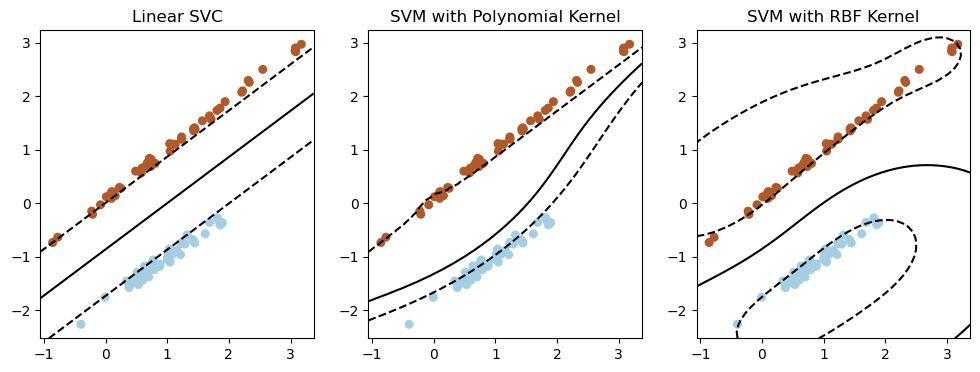

In [8]:
def plot_decision_boundary(clf, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.title(title)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_decision_boundary(svc_linear, X, y, "Linear SVC")

plt.subplot(132)
plot_decision_boundary(svm_poly, X, y, "SVM with Polynomial Kernel")

plt.subplot(133)
plot_decision_boundary(svm_rbf, X, y, "SVM with RBF Kernel")

plt.show()